**STEP 1: Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#DATA READING

In [2]:
customers = pd.read_csv("Customers.csv")
customers

,CustomerID,Name,Phone,Address,City
0,1,Kavya Reddy,9193214172,"Koramangala, Delhi",Mumbai
1,2,Siddharth Joshi,1628503012,"Civil Lines, Jaipur",Pune
2,3,Neha Joshi,6430427670,"Civil Lines, Hyderabad",Jaipur
3,4,Siddharth Mehta,2645852001,"MG Road, Jaipur",Jaipur
4,5,Rajesh Reddy,2428071930,"Koramangala, Pune",Ahmedabad
...,...,...,...,...,...
295,296,Rohit Sharma,6671028571,"Gachibowli, Bangalore",Jaipur
296,297,Siddharth Joshi,6721377969,"Malviya Nagar, Pune",Jaipur
297,298,Aarav Sharma,6633244842,"Andheri West, Ahmedabad",Ahmedabad
298,299,Pooja Gupta,8413555089,"Civil Lines, Delhi",Delhi


In [3]:
orders = pd.read_csv("Orders.csv")
orders

,OrderID,CustomerID,OrderDateTime,DeliveryDateTime,TotalAmount,DeliveryStatus
0,1,17,2024-11-17 22:12:56,2024-11-17 22:27:56,113,Delivered
1,2,71,2024-11-13 10:52:56,2024-11-13 11:03:56,1170,Delivered
2,3,2,2024-10-25 03:06:56,2024-10-25 03:17:56,837,Delivered
3,4,155,2024-10-13 20:52:56,2024-10-13 21:05:56,357,Delivered
4,5,270,2024-10-22 05:01:56,2024-10-22 05:12:56,410,Delivered
...,...,...,...,...,...,...
3995,3996,163,2024-11-15 17:59:56,2024-11-15 18:16:56,1130,Delivered
3996,3997,13,2024-11-09 10:02:56,2024-11-09 10:18:56,670,Delivered
3997,3998,97,2024-11-10 22:47:56,2024-11-10 22:58:56,950,Delivered
3998,3999,273,2024-09-30 22:37:56,2024-09-30 22:45:56,778,Delivered


In [4]:
order_details = pd.read_csv("OrderDetails.csv")
order_details

,OrderDetailsID,OrderID,ProductName,Quantity,PricePerUnit
0,1,2262,Clinic Plus Shampoo,1,99
1,2,115,Maggi Noodles,5,120
2,3,3872,Harpic Toilet Cleaner,4,300
3,4,3489,Ariel Detergent,5,99
4,5,1717,Bournvita,3,99
...,...,...,...,...,...
9995,9996,1240,Good Day Cookies,5,80
9996,9997,946,Parle-G Biscuits,1,130
9997,9998,2576,Maggi Noodles,2,35
9998,9999,2336,Fortune Oil,1,99


#DATA INFO AND CLEANING

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  300 non-null    int64 
 1   Name        300 non-null    object
 2   Phone       300 non-null    int64 
 3   Address     300 non-null    object
 4   City        300 non-null    object
dtypes: int64(2), object(3)
memory usage: 11.8+ KB


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   OrderID           4000 non-null   int64 
 1   CustomerID        4000 non-null   int64 
 2   OrderDateTime     4000 non-null   object
 3   DeliveryDateTime  3924 non-null   object
 4   TotalAmount       4000 non-null   int64 
 5   DeliveryStatus    4000 non-null   object
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [7]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OrderDetailsID  10000 non-null  int64 
 1   OrderID         10000 non-null  int64 
 2   ProductName     10000 non-null  object
 3   Quantity        10000 non-null  int64 
 4   PricePerUnit    10000 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 390.8+ KB


In [8]:
customers.isnull().sum()

,0
CustomerID,0
Name,0
Phone,0
Address,0
City,0


In [9]:
orders.isnull().sum()

,0
OrderID,0
CustomerID,0
OrderDateTime,0
DeliveryDateTime,76
TotalAmount,0
DeliveryStatus,0


In [10]:
order_details.isnull().sum()

,0
OrderDetailsID,0
OrderID,0
ProductName,0
Quantity,0
PricePerUnit,0


In [11]:
customers.duplicated().sum()

np.int64(0)

In [12]:
orders.duplicated().sum()

np.int64(0)

In [13]:
order_details.duplicated().sum()

np.int64(0)

In [14]:
city_count = customers.groupby('City').agg({"CustomerID":"count"})
city_count

,CustomerID
City,
Ahmedabad,46
Bangalore,34
Delhi,37
Hyderabad,48
Jaipur,49
Mumbai,47
Pune,39


In [15]:
join_orders_cumsters = pd.merge(left = orders, right = customers,on = "CustomerID", how = "inner")
join_orders_cumsters

,OrderID,CustomerID,OrderDateTime,DeliveryDateTime,TotalAmount,DeliveryStatus,Name,Phone,Address,City
0,1,17,2024-11-17 22:12:56,2024-11-17 22:27:56,113,Delivered,Rohit Pandey,4625735153,"Malviya Nagar, Delhi",Delhi
1,2,71,2024-11-13 10:52:56,2024-11-13 11:03:56,1170,Delivered,Pooja Joshi,7598229457,"Civil Lines, Delhi",Ahmedabad
2,3,2,2024-10-25 03:06:56,2024-10-25 03:17:56,837,Delivered,Siddharth Joshi,1628503012,"Civil Lines, Jaipur",Pune
3,4,155,2024-10-13 20:52:56,2024-10-13 21:05:56,357,Delivered,Rajesh Singh,468292990,"Malviya Nagar, Jaipur",Hyderabad
4,5,270,2024-10-22 05:01:56,2024-10-22 05:12:56,410,Delivered,Ananya Gupta,4195752139,"Civil Lines, Hyderabad",Ahmedabad
...,...,...,...,...,...,...,...,...,...,...
3995,3996,163,2024-11-15 17:59:56,2024-11-15 18:16:56,1130,Delivered,Rajesh Khan,6903961149,"Satellite, Hyderabad",Ahmedabad
3996,3997,13,2024-11-09 10:02:56,2024-11-09 10:18:56,670,Delivered,Aarav Sharma,9412974585,"Koramangala, Jaipur",Hyderabad
3997,3998,97,2024-11-10 22:47:56,2024-11-10 22:58:56,950,Delivered,Pooja Mehta,2978712294,"Satellite, Hyderabad",Jaipur
3998,3999,273,2024-09-30 22:37:56,2024-09-30 22:45:56,778,Delivered,Rajesh Sharma,1080118875,"MG Road, Hyderabad",Jaipur


In [16]:
revenue_city = join_orders_cumsters.groupby(["City", "DeliveryStatus"]).agg({"TotalAmount":"sum"})
revenue_city

TotalAmount
City      DeliveryStatus             
Ahmedabad Cancelled              6578
          Delivered            475208
Bangalore Cancelled              5960
          Delivered            373445
Delhi     Cancelled             13225
          Delivered            383151
Hyderabad Cancelled              9541
          Delivered            512445
Jaipur    Cancelled             11799
          Delivered            515888
Mumbai    Cancelled              7303
          Delivered            504781
Pune      Cancelled              8898
          Delivered            392266

In [24]:
#revenue by city
revenue_city_reset = revenue_city.reset_index()
revenue_city_reset

,City,DeliveryStatus,OrderID,TotalAmount
0,Ahmedabad,Cancelled,6,6578
1,Ahmedabad,Delivered,592,475208
2,Bangalore,Cancelled,9,5960
3,Bangalore,Delivered,466,373445
4,Delhi,Cancelled,15,13225
5,Delhi,Delivered,486,383151
6,Hyderabad,Cancelled,11,9541
7,Hyderabad,Delivered,620,512445
8,Jaipur,Cancelled,16,11799
9,Jaipur,Delivered,642,515888


<Axes: title={'center': 'Total Revenue by City'}, xlabel='City', ylabel='TotalAmount'>

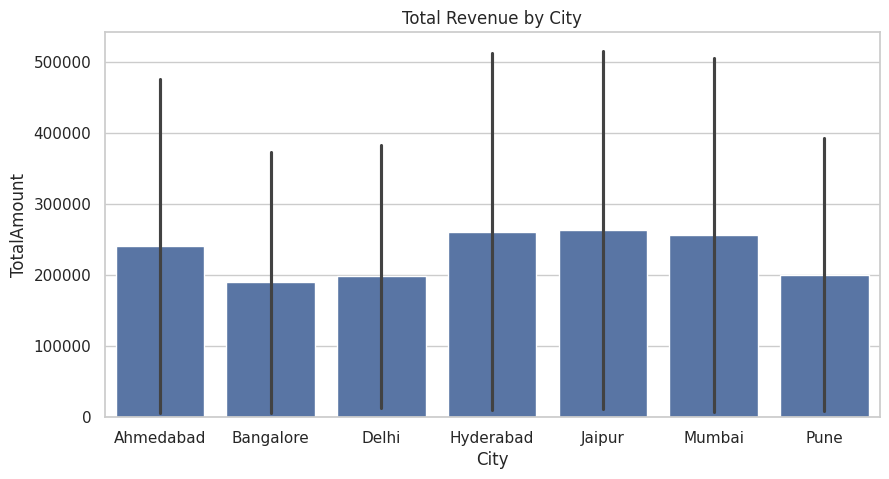

In [47]:
#visualizing revenue by city
plt.figure(figsize=(10, 5))
plt.title("Total Revenue by City")
sns.barplot(x=revenue_city_reset["City"],y=revenue_city_reset["TotalAmount"])

In [17]:
status = join_orders_cumsters.groupby("DeliveryStatus").agg({"TotalAmount":"sum"})
status
status['TotalAmount'] = status['TotalAmount'].astype(int)
status

,TotalAmount
DeliveryStatus,
Cancelled,63304
Delivered,3157184


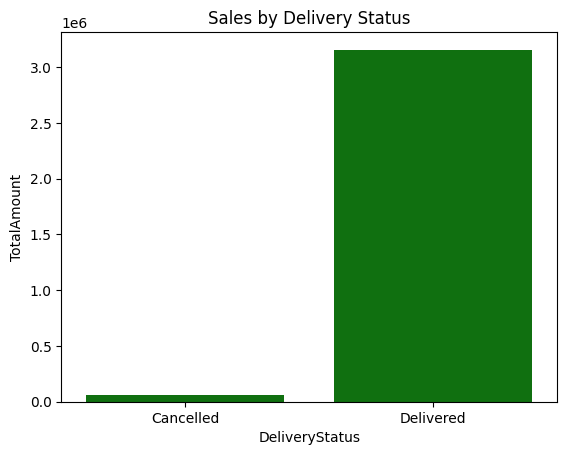

In [18]:
sns.barplot(x = status.index, y = "TotalAmount", data =status, color="green")
plt.title('Sales by Delivery Status')
plt.show()

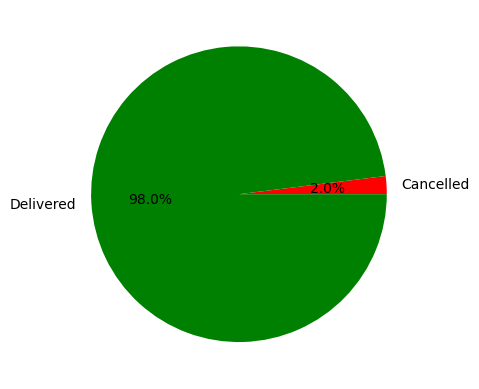

In [19]:
plt.pie(status["TotalAmount"], labels=status.index, colors=["red","green"],autopct='%1.1f%%')
plt.show()

In [20]:
revenue_city = join_orders_cumsters.groupby(["City", "DeliveryStatus"]).agg({"OrderID":"count", "TotalAmount":"sum"})
revenue_city

OrderID  TotalAmount
City      DeliveryStatus                      
Ahmedabad Cancelled             6         6578
          Delivered           592       475208
Bangalore Cancelled             9         5960
          Delivered           466       373445
Delhi     Cancelled            15        13225
          Delivered           486       383151
Hyderabad Cancelled            11         9541
          Delivered           620       512445
Jaipur    Cancelled            16        11799
          Delivered           642       515888
Mumbai    Cancelled             8         7303
          Delivered           618       504781
Pune      Cancelled            11         8898
          Delivered           500       392266

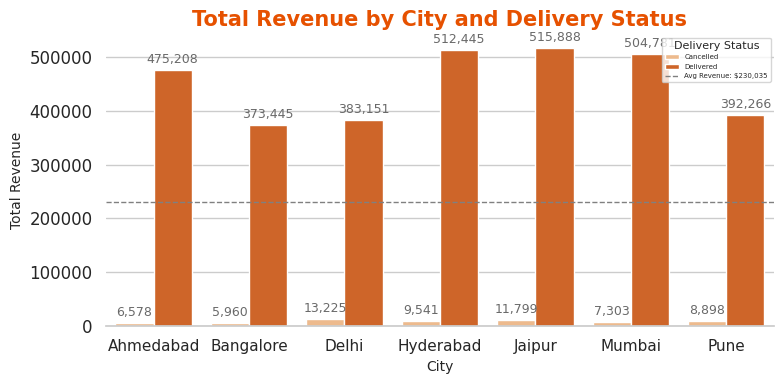

In [21]:
revenue_city_reset = revenue_city.reset_index()
orange_palette = sns.color_palette("Oranges", n_colors = revenue_city_reset["DeliveryStatus"].nunique())

plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid")
ax=sns.barplot(
    data=revenue_city_reset,
    x="City",
    y="TotalAmount",
    hue="DeliveryStatus",
    palette= orange_palette
)
plt.title("Total Revenue by City and Delivery Status", fontsize=15, fontweight='bold', color='#E65100')
plt.xlabel("City", fontsize=10)
plt.ylabel("Total Revenue", fontsize=10)
plt.yticks(fontsize=12)
for container in ax.containers:
  ax.bar_label(container, fmt='{:,.0f}', label_type='edge', fontsize=9, padding=3, color='dimgray')
average_revenue = revenue_city["TotalAmount"].mean().mean()
plt.axhline(average_revenue, color='gray', linestyle='--', linewidth=1, label=f'Avg Revenue: ${average_revenue:,.0f}')
plt.legend(title="Delivery Status", fontsize=5, title_fontsize=8, loc='upper right')
plt.tight_layout()
sns.despine(left=True)
plt.show()

In [44]:
#customer distribution by city
customer_city = customers.groupby("City").agg({"CustomerID":"count"})
customer_city

,CustomerID
City,
Ahmedabad,46
Bangalore,34
Delhi,37
Hyderabad,48
Jaipur,49
Mumbai,47
Pune,39


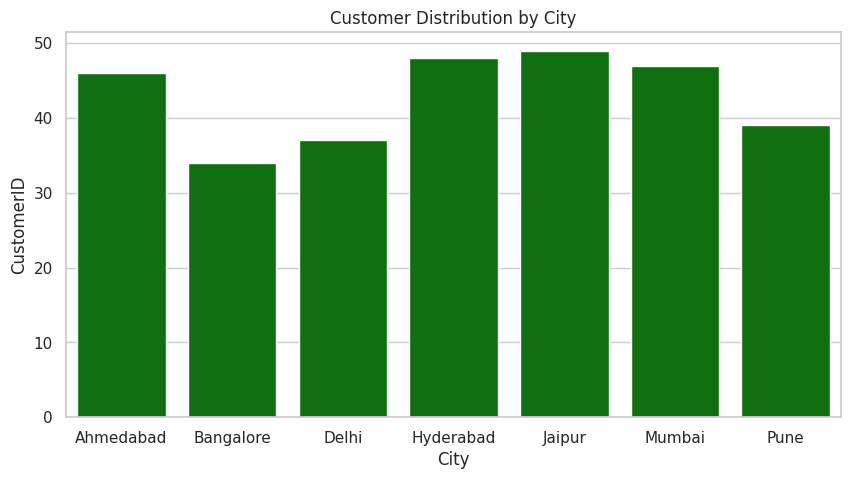

In [48]:
plt.figure(figsize=(10, 5))
sns.barplot(x = customer_city.index, y = "CustomerID", data =customer_city, color="green")
plt.title('Customer Distribution by City')
plt.show()

In [50]:
#Top products by quality sold
top_products = order_details.groupby("ProductName").agg({"Quantity":"sum"})
top_products

,Quantity
ProductName,
Aashirvaad Atta,1490
Amul Butter,1531
Ariel Detergent,1483
Bournvita,1466
Britannia Rusk,1439
Clinic Plus Shampoo,1394
Colgate Toothpaste,1457
Dettol Liquid,1428
Dove Soap,1604


In [53]:
#sorting data
top_products_reset = top_products.sort_values(by='Quantity', ascending=False)
top_products_reset

,Quantity
ProductName,
Harpic Toilet Cleaner,1701
Dove Soap,1604
Parle-G Biscuits,1598
Nestle Milk,1574
Tata Tea Gold,1567
Himalaya Face Wash,1559
Godrej Hair Dye,1541
Amul Butter,1531
Good Day Cookies,1528


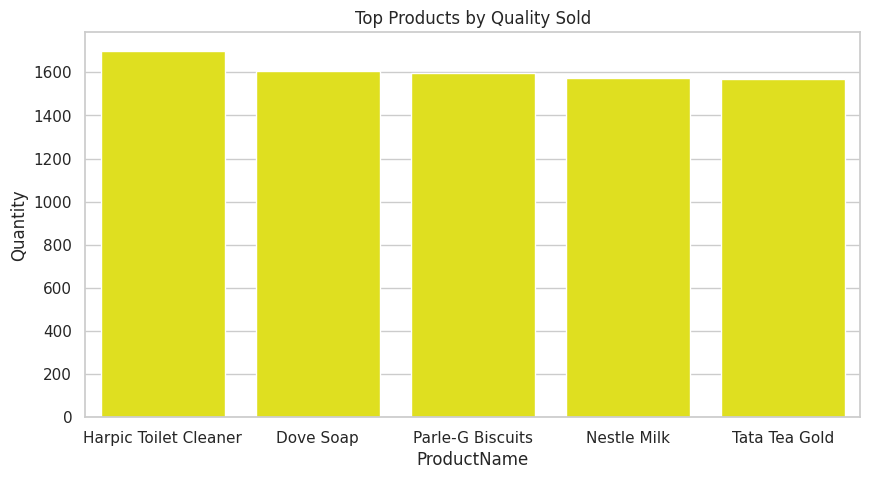

In [59]:
#visulaizing
plt.figure(figsize=(10, 5))
sns.barplot(x = top_products_reset.head(5).index, y = "Quantity", data =top_products_reset.head(5), color="yellow")
plt.title('Top Products by Quality Sold')
plt.show()

In [62]:
#Daily order trends
orders['OrderDateTime'] = pd.to_datetime(orders['OrderDateTime'])
orders['OrderDateTime'] = orders['OrderDateTime'].dt.date
orders

,OrderID,CustomerID,OrderDateTime,DeliveryDateTime,TotalAmount,DeliveryStatus
0,1,17,2024-11-17,2024-11-17 22:27:56,113,Delivered
1,2,71,2024-11-13,2024-11-13 11:03:56,1170,Delivered
2,3,2,2024-10-25,2024-10-25 03:17:56,837,Delivered
3,4,155,2024-10-13,2024-10-13 21:05:56,357,Delivered
4,5,270,2024-10-22,2024-10-22 05:12:56,410,Delivered
...,...,...,...,...,...,...
3995,3996,163,2024-11-15,2024-11-15 18:16:56,1130,Delivered
3996,3997,13,2024-11-09,2024-11-09 10:18:56,670,Delivered
3997,3998,97,2024-11-10,2024-11-10 22:58:56,950,Delivered
3998,3999,273,2024-09-30,2024-09-30 22:45:56,778,Delivered


In [65]:
#visualize
daily_orders = orders.groupby('OrderDateTime').agg({'TotalAmount':'count'})
daily_orders

,TotalAmount
OrderDateTime,
2024-09-26,31
2024-09-27,65
2024-09-28,60
2024-09-29,54
2024-09-30,59
2024-10-01,58
2024-10-02,62
2024-10-03,70
2024-10-04,56


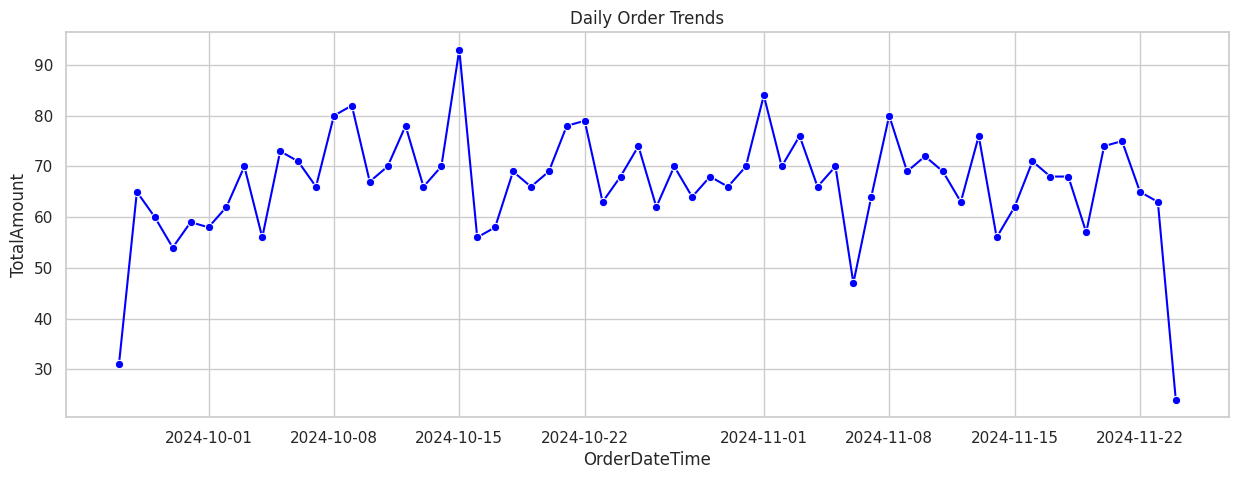

In [72]:
figsize = (15, 5)
plt.figure(figsize=figsize)
sns.lineplot(x = daily_orders.index, y = "TotalAmount", data =daily_orders, color="blue",marker='o')
plt.title('Daily Order Trends')
plt.show()

In [73]:
#Average order by city
average_order_city = join_orders_cumsters.groupby("City").agg({"TotalAmount":"mean"})
average_order_city


,TotalAmount
City,
Ahmedabad,805.662207
Bangalore,798.747368
Delhi,791.169661
Hyderabad,827.236133
Jaipur,801.955927
Mumbai,818.025559
Pune,785.056751


<ipython-input-77-65474b579657>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = average_order_city.index, y = "TotalAmount", data =average_order_city, palette="pastel")


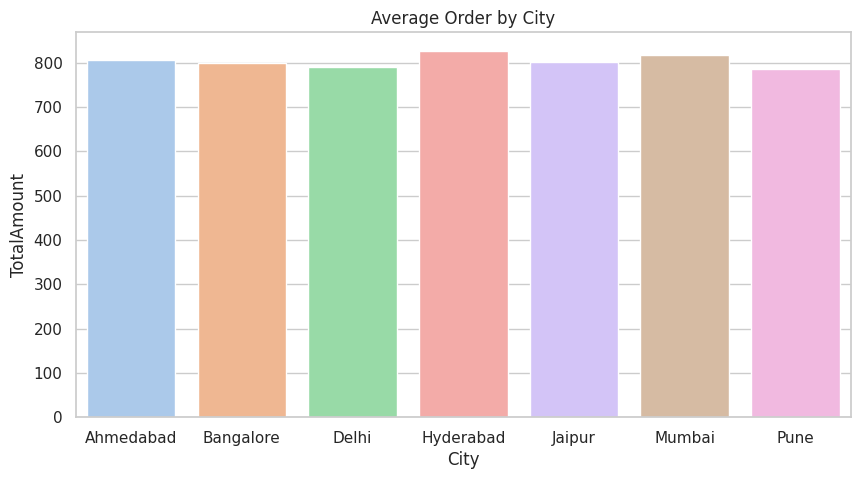

In [77]:
#visualize
plt.figure(figsize=(10, 5))
sns.barplot(x = average_order_city.index, y = "TotalAmount", data =average_order_city, palette="pastel")
plt.title('Average Order by City')
plt.show()

#Create new columns for Revenue contribution by products:

Revenue = Quantity × PricePerUnit

DeliveryTime = DeliveryDateTime - OrderDateTime

In [87]:
df = order_details.merge(orders, on='OrderID')
df['DeliveryDateTime'] = pd.to_datetime(df['DeliveryDateTime'])
df['OrderDateTime'] = pd.to_datetime(df['OrderDateTime'])
df['Revenue'] = df['Quantity'] * df['PricePerUnit']
df['DeliveryTimeMinutes'] = (df['DeliveryDateTime'] - df['OrderDateTime']).dt.total_seconds() / 60

In [92]:
top_products = df.groupby('ProductName')['Revenue'].sum().sort_values(ascending=False).head(10)
top_products

,Revenue
ProductName,
Harpic Toilet Cleaner,156993
Dove Soap,152735
Himalaya Face Wash,144249
Parle-G Biscuits,140283
Tata Tea Gold,139663
Good Day Cookies,138397
Amul Butter,138031
Red Label Tea,136761
Nestle Milk,136472


<ipython-input-99-829e3d33cdce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='pastel')


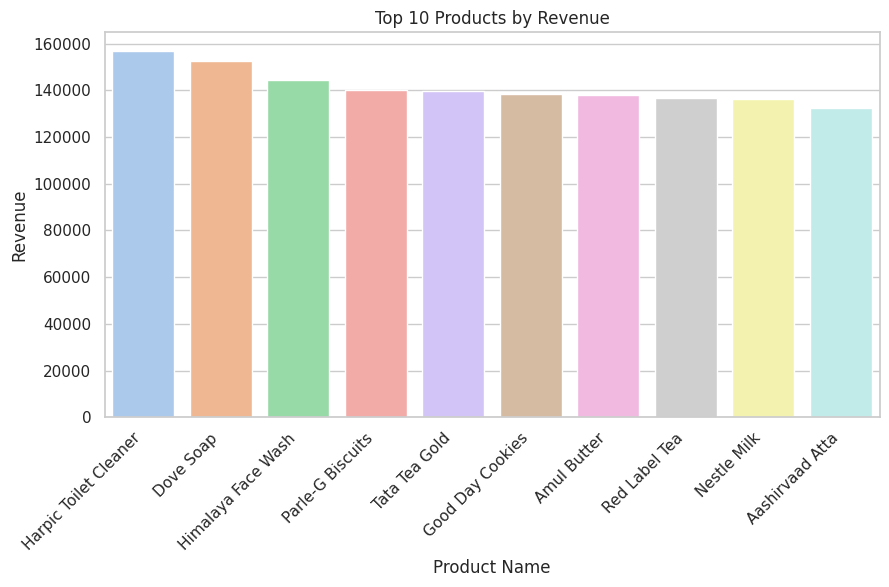

In [99]:
figsize = (10, 5)
plt.figure(figsize=figsize)
sns.barplot(x=top_products.index, y=top_products.values, palette='pastel')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()